In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
columns = ['Age','Gender','Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase', 'Alamine Aminotransferase', 
           'Aspartate Aminotransferase', 'Total Protiens', 'Albumin', 'Albumin and Globulin Ratio','Selector']
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', names=columns)
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total Bilirubin               583 non-null float64
Direct Bilirubin              583 non-null float64
Alkaline Phosphotase          583 non-null int64
Alamine Aminotransferase      583 non-null int64
Aspartate Aminotransferase    583 non-null int64
Total Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin and Globulin Ratio    579 non-null float64
Selector                      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [0]:
## Dealing with missing values.
# OUT OF 583 ROWS ONLY 4 ROWS HAVE MISSING VALUES IN ALBUMIN AND GLOBULIN RATIO COLUMNS. 
## THAT ACCOUNTS FOR ONLY 0.68% OF MISSING DATA
##THEREFORE IS THESE MISSING VALUES ARE OMITTED , THE DATA SET SHOULD NOT BE AFFECTED

In [94]:
## convert the values of gender from string to respective integers
from sklearn.preprocessing import LabelEncoder
data.loc[:,'Gender'] = LabelEncoder().fit_transform(data['Gender'])
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [95]:
## droping the nan rows
data = data.dropna(how='any', axis=0)
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null int64
Total Bilirubin               579 non-null float64
Direct Bilirubin              579 non-null float64
Alkaline Phosphotase          579 non-null int64
Alamine Aminotransferase      579 non-null int64
Aspartate Aminotransferase    579 non-null int64
Total Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin and Globulin Ratio    579 non-null float64
Selector                      579 non-null int64
dtypes: float64(5), int64(6)
memory usage: 54.3 KB


In [115]:
data.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


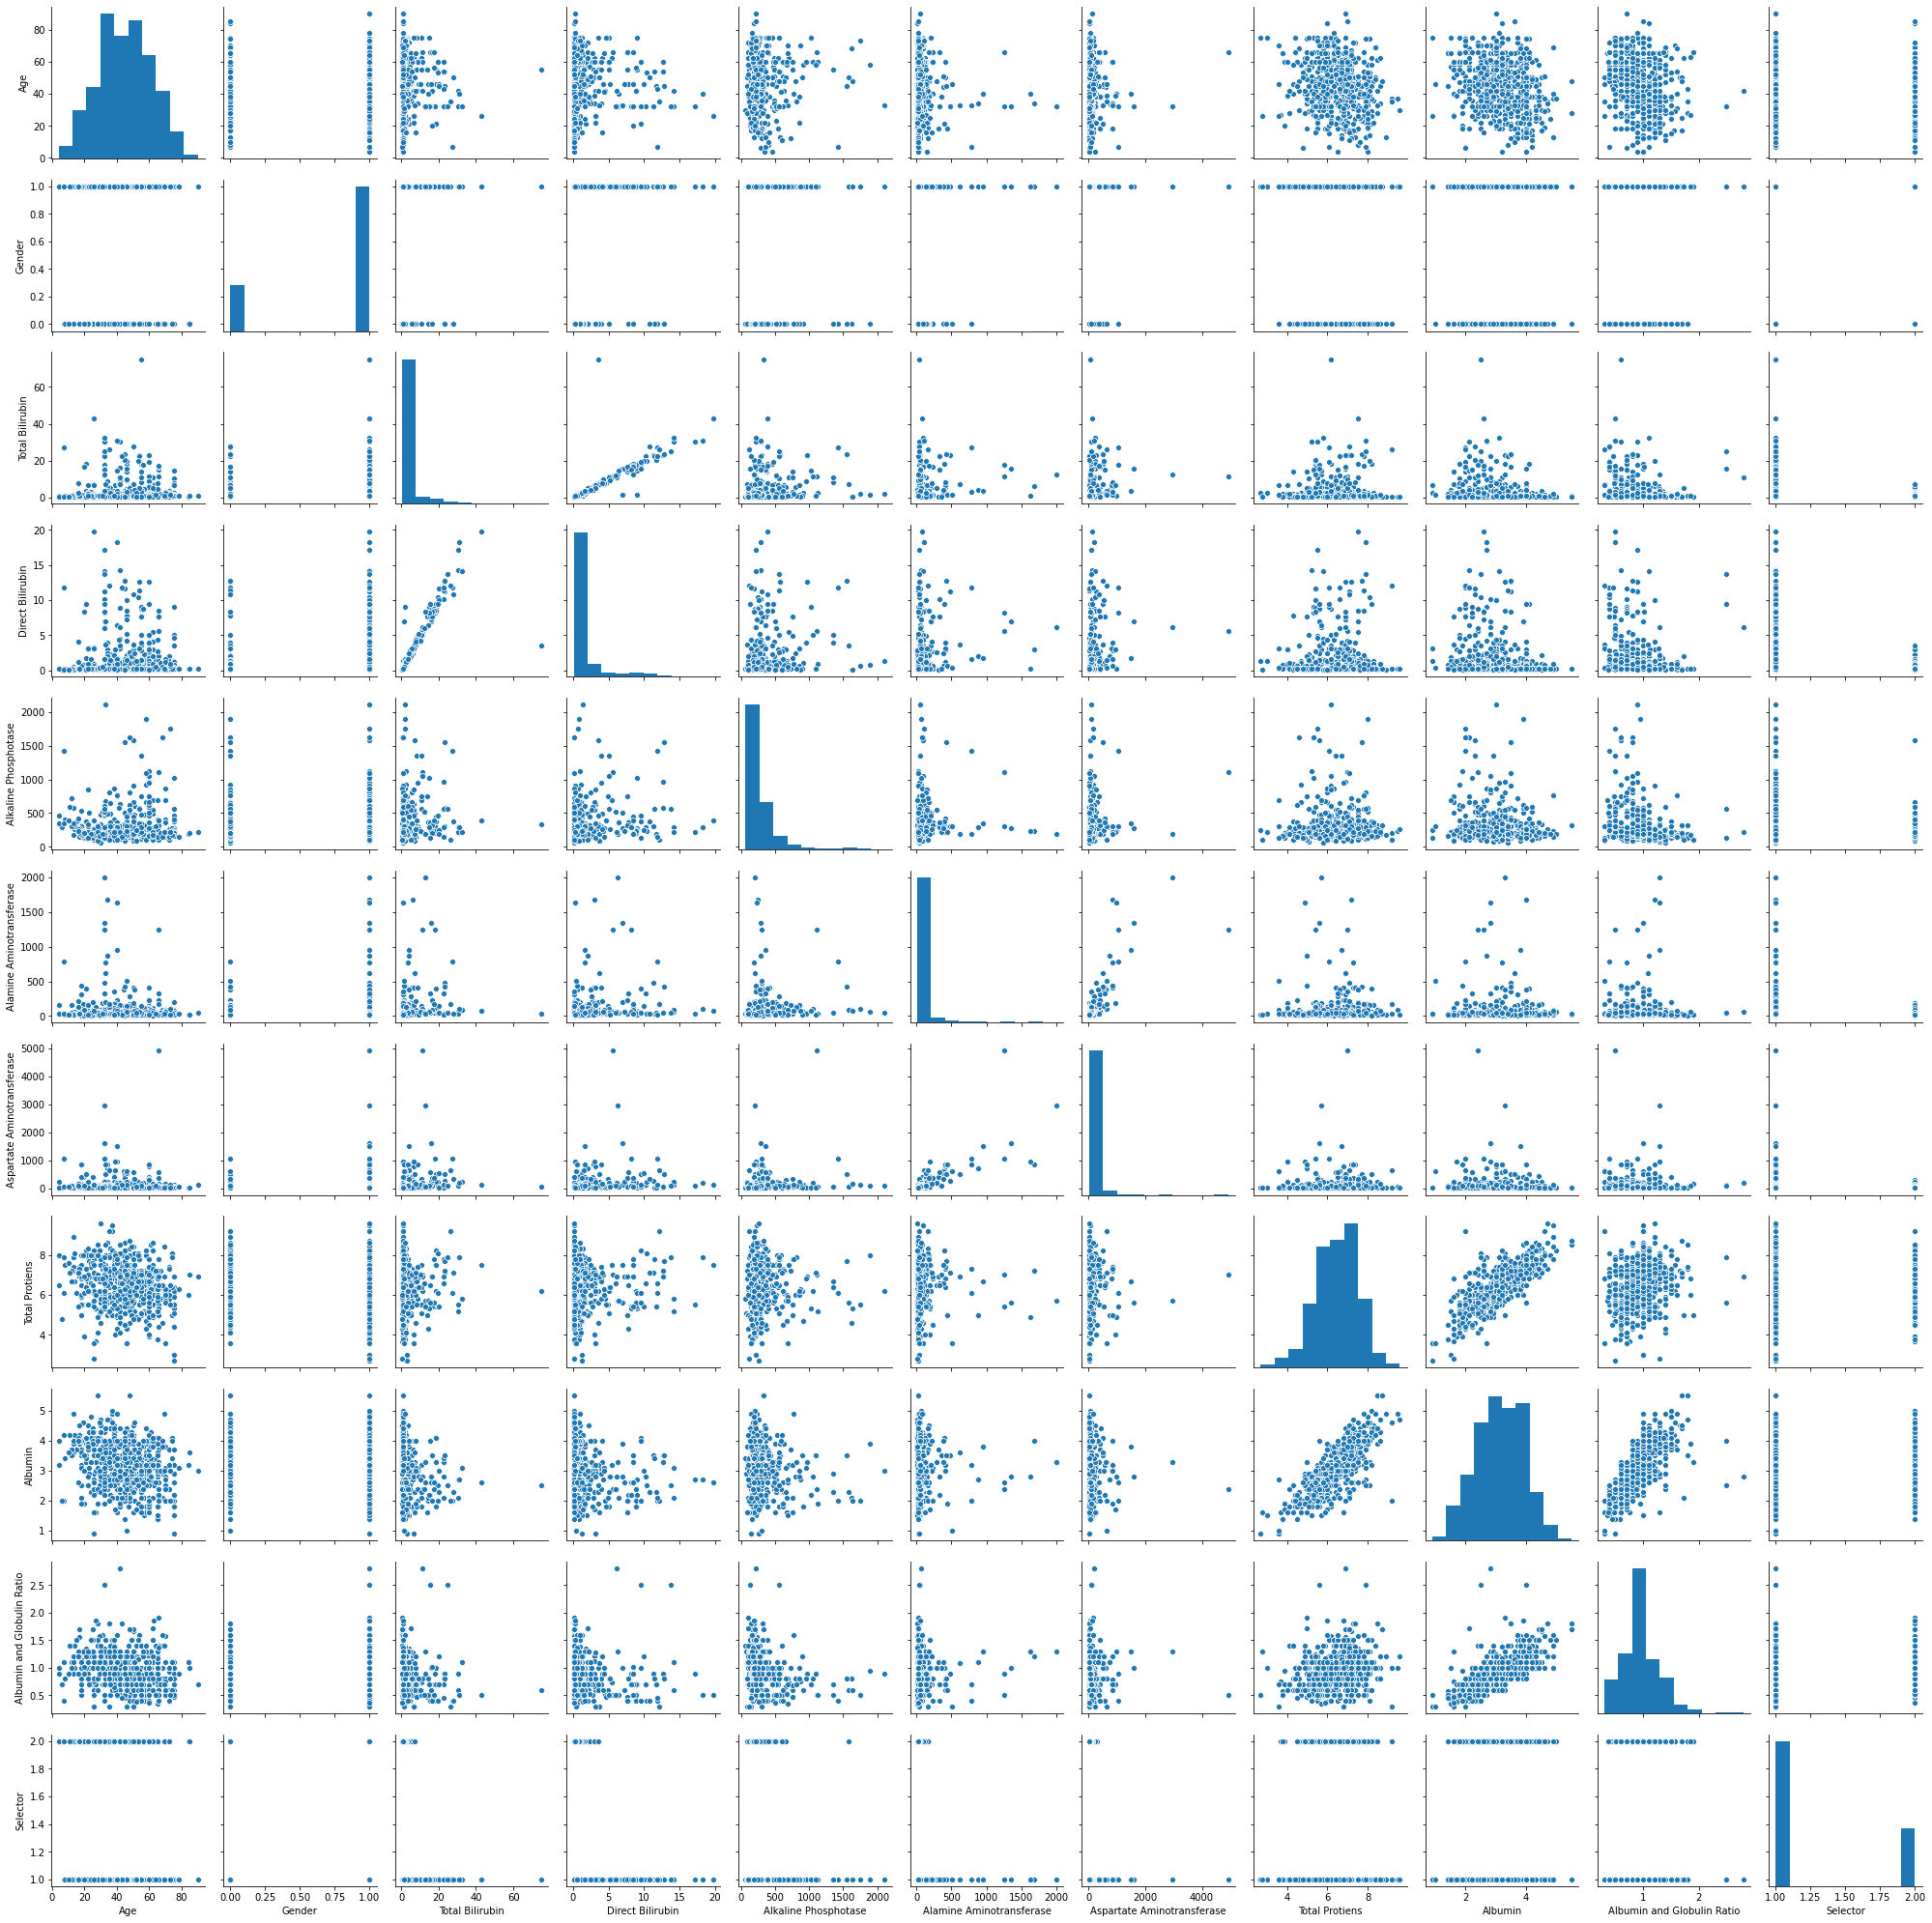

In [116]:
sns.pairplot(data)

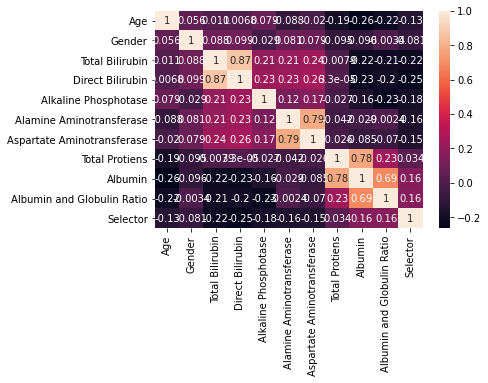

In [119]:
sns.heatmap(data.corr(),annot=True)

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop('Selector', axis=1)
y = data['Selector']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [0]:
##Scaling the features
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [125]:
#Using unscaled  datafrom sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("k-NN Classifier on unscaled test data:")
print("Accuracy:", knn.score(X_test, y_test))
print("Precision:", precision_score(y_test, knn.predict(X_test)))
print("Recall:", recall_score(y_test, knn.predict(X_test)))
print("F-1 score:", f1_score(y_test, knn.predict(X_test)))

k-NN Classifier on unscaled test data:
Accuracy: 0.6436781609195402
Precision: 0.6834532374100719
Recall: 0.8407079646017699
F-1 score: 0.753968253968254


In [127]:
#Using scaled data
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", knn_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, knn_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, knn_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, knn_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 0.6839080459770115
Precision: 0.6959459459459459
Recall: 0.911504424778761
F-1 score: 0.7892720306513409


In [129]:
#using normal data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", rfc.score(X_test, y_test))
print("Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Recall:", recall_score(y_test, rfc.predict(X_test)))
print("F-1 score:", f1_score(y_test, rfc.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 0.6724137931034483
Precision: 0.6818181818181818
Recall: 0.9292035398230089
F-1 score: 0.7865168539325843


In [131]:
#using scaled data
rfc_scaled = RandomForestClassifier(n_estimators = 20)
rfc_scaled.fit(X_train_scaled, y_train)
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", rfc_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, rfc_scaled.predict(X_test_scaled)))

Random Forest Classifier on scaled test data:
Accuracy: 0.6839080459770115
Precision: 0.6835443037974683
Recall: 0.9557522123893806
F-1 score: 0.7970479704797048


In [133]:
#Using normal data
from sklearn.svm import SVC
svc_clf = SVC(C = 0.1, kernel = 'rbf').fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", svc_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc_clf.predict(X_test)))
print("Recall:", recall_score(y_test, svc_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc_clf.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 0.6494252873563219
Precision: 0.6494252873563219
Recall: 1.0
F-1 score: 0.7874564459930314


In [134]:
#Using scaled data
svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_clf_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 0.6494252873563219
Precision: 0.6494252873563219
Recall: 1.0
F-1 score: 0.7874564459930314
